In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy import ndimage, misc

In [2]:
# Change presentation settings
%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (15.0, 8.0)
matplotlib.rcParams["xtick.labelsize"] = 16
matplotlib.rcParams["ytick.labelsize"] = 16
matplotlib.rcParams["axes.spines.left"] = True
matplotlib.rcParams["axes.spines.bottom"] = True
matplotlib.rcParams["axes.spines.right"] = True
matplotlib.rcParams["axes.spines.top"] = True
matplotlib.rcParams["axes.titlesize"] = 16
matplotlib.rcParams["figure.titlesize"] = 16
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["legend.fontsize"] = 14

In [3]:
lumi_directory = data_directory = "./lumi"

In [4]:
int_lumi = pd.read_csv(("%s/minkia.csv" % lumi_directory),
           names=["run:fill", "ls", "time", "beamstatus", "energy", "delivered", "recorded", "avgpu", "source"])

int_lumi2 = pd.read_csv(("%s/lumi_per_ls.csv" % lumi_directory),
           names=["run:fill", "ls", "time", "beamstatus", "energy", "delivered", "recorded", "avgpu", "source"])

In [5]:
int_lumi["delivered"].dtype

dtype('O')

In [6]:
int_lumi.drop(int_lumi.index[[0,1,2034,2035,2036]], inplace=True)
int_lumi2.drop(int_lumi2.index[[0,1,2034,2035,2036]], inplace=True)
print int_lumi

         run:fill         ls               time    beamstatus energy  \
2     306777:6396        1:1  11/17/17 21:48:20  STABLE BEAMS   2510   
3     306777:6396        2:2  11/17/17 21:48:43  STABLE BEAMS   2510   
4     306777:6396        3:3  11/17/17 21:49:06  STABLE BEAMS   2510   
5     306777:6396        4:4  11/17/17 21:49:30  STABLE BEAMS   2510   
6     306777:6396        5:5  11/17/17 21:49:53  STABLE BEAMS   2510   
7     306777:6396        6:6  11/17/17 21:50:16  STABLE BEAMS   2510   
8     306777:6396        7:7  11/17/17 21:50:40  STABLE BEAMS   2510   
9     306777:6396        8:8  11/17/17 21:51:03  STABLE BEAMS   2510   
10    306777:6396        9:9  11/17/17 21:51:26  STABLE BEAMS   2510   
11    306777:6396      10:10  11/17/17 21:51:49  STABLE BEAMS   2510   
12    306777:6396      11:11  11/17/17 21:52:13  STABLE BEAMS   2510   
13    306777:6396      12:12  11/17/17 21:52:36  STABLE BEAMS   2510   
14    306777:6396      13:13  11/17/17 21:52:59  STABLE BEAMS   

In [7]:
print int_lumi2

         run:fill         ls               time    beamstatus energy  \
2     306777:6396        1:1  11/17/17 21:48:20  STABLE BEAMS   2510   
3     306777:6396        2:2  11/17/17 21:48:43  STABLE BEAMS   2510   
4     306777:6396        3:3  11/17/17 21:49:06  STABLE BEAMS   2510   
5     306777:6396        4:4  11/17/17 21:49:30  STABLE BEAMS   2510   
6     306777:6396        5:5  11/17/17 21:49:53  STABLE BEAMS   2510   
7     306777:6396        6:6  11/17/17 21:50:16  STABLE BEAMS   2510   
8     306777:6396        7:7  11/17/17 21:50:40  STABLE BEAMS   2510   
9     306777:6396        8:8  11/17/17 21:51:03  STABLE BEAMS   2510   
10    306777:6396        9:9  11/17/17 21:51:26  STABLE BEAMS   2510   
11    306777:6396      10:10  11/17/17 21:51:49  STABLE BEAMS   2510   
12    306777:6396      11:11  11/17/17 21:52:13  STABLE BEAMS   2510   
13    306777:6396      12:12  11/17/17 21:52:36  STABLE BEAMS   2510   
14    306777:6396      13:13  11/17/17 21:52:59  STABLE BEAMS   

In [8]:
int_lumi["delivered"] = int_lumi["delivered"].astype('float64')
int_lumi["recorded"] = int_lumi["recorded"].astype('float64')
int_lumi2["delivered"] = int_lumi2["delivered"].astype('float64')
int_lumi2["recorded"] = int_lumi2["recorded"].astype('float64') 

In [9]:
int_lumi["delivered"].dtype
int_lumi["inst_lumi_del"] = int_lumi["delivered"]/23;
int_lumi["inst_lumi_rec"] = int_lumi["recorded"]/23;

In [10]:
def transform_time(data):
    from datetime import datetime
    time_str = data.time
    #print time_str
    datetime_object = datetime.strptime(time_str, "%m/%d/%y %H:%M:%S")
    #print datetime_object
    return datetime_object

In [11]:
int_lumi["time"] = int_lumi.apply(transform_time, axis=1);
int_lumi2["time"] = int_lumi2.apply(transform_time, axis=1);

In [12]:
#print int_lumi["time"]

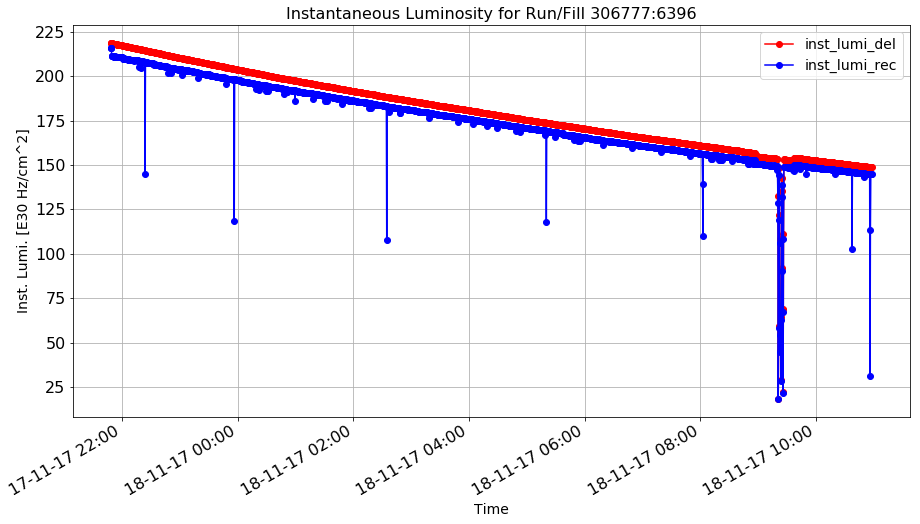

In [13]:
def plot_inst_lumi(x_val, y_val, z_val, title):
    import datetime
    import matplotlib.dates as mdates
    fig, ax = plt.subplots()
    plt.xlabel("Time")
    plt.ylabel("Inst. Lumi. [E30 Hz/cm^2]")
    xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
    ax.xaxis.set_major_formatter(xfmt)
    ax.grid()
    fig.autofmt_xdate()
    plt.plot(x_val, y_val, 'ro-')
    plt.plot(x_val, z_val, 'bo-')
    plt.title(title)
    plt.legend(loc="best")
    plt.show();
    
plot_inst_lumi(int_lumi["time"], int_lumi["inst_lumi_del"], int_lumi["inst_lumi_rec"], "Instantaneous Luminosity for Run/Fill "+int_lumi["run:fill"][2])

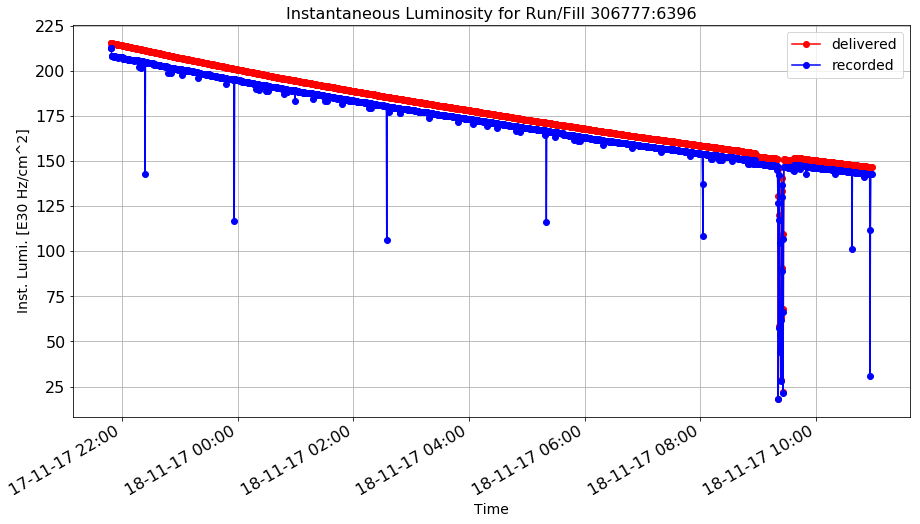

In [14]:
plot_inst_lumi(int_lumi2["time"], int_lumi2["delivered"], int_lumi2["recorded"], "Instantaneous Luminosity for Run/Fill "+int_lumi["run:fill"][2])

In [15]:
int_lumi3 = pd.read_csv(("%s/lumi_per_bx.csv" % lumi_directory),
           names=["run:fill", "ls", "time", "beamstatus", "energy", "delivered", "recorded", "avgpu", "source", "bx"])

In [16]:
int_lumi3.drop(int_lumi3.index[[0,1,2034,2035,2036]], inplace=True)

In [17]:
print int_lumi3["bx"]

2       [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
3       [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
4       [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
5       [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
6       [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
7       [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
8       [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
9       [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
10      [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
11      [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
12      [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
13      [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
14      [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
15      [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
16      [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
17      [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
18      [1 0.0000 0.0000 2 0.0000 0.0000 3 0.0000 0.00...
19      [1 0.0

In [18]:
def convertToArray(data):
    temp = data.split()
    temp2 = map(lambda each:each.strip("["),temp)
    temp3 = map(lambda each:each.strip("]"),temp2)
    return temp3
int_lumi3["bx"] = int_lumi3["bx"].apply(convertToArray)

In [19]:
print int_lumi3["bx"].iloc[0]
print len(int_lumi3["bx"].iloc[0])

['1', '0.0000', '0.0000', '2', '0.0000', '0.0000', '3', '0.0000', '0.0000', '4', '0.0000', '0.0000', '5', '0.0000', '0.0000', '6', '0.0000', '0.0000', '7', '0.0000', '0.0000', '8', '0.0000', '0.0000', '9', '0.0000', '0.0000', '10', '0.0000', '0.0000', '11', '0.0000', '0.0000', '12', '0.0000', '0.0000', '13', '0.0000', '0.0000', '14', '0.0000', '0.0000', '15', '0.0001', '0.0001', '16', '0.0001', '0.0001', '17', '0.0000', '0.0000', '18', '0.0001', '0.0001', '19', '0.0000', '0.0000', '20', '0.0000', '0.0000', '21', '0.0001', '0.0001', '22', '0.0001', '0.0001', '23', '0.0002', '0.0002', '24', '0.0005', '0.0005', '25', '0.0006', '0.0006', '26', '0.0004', '0.0004', '27', '0.0006', '0.0006', '28', '0.0006', '0.0006', '29', '0.0005', '0.0005', '30', '0.0001', '0.0001', '31', '0.0001', '0.0001', '32', '0.0002', '0.0002', '33', '0.0002', '0.0002', '34', '0.0001', '0.0001', '35', '0.0000', '0.0000', '36', '0.0002', '0.0002', '37', '0.0002', '0.0002', '38', '0.0000', '0.0000', '39', '0.0000', '0.0

In [20]:
def slice_it(data, size):
    temp = zip(*[iter(data)]*size)
    return temp

def splitArray(data):
    temp = map(float, data)
    temp2 = slice_it(temp, 3)
    return temp2

In [21]:
int_lumi3["bx"] = int_lumi3["bx"].apply(splitArray)

In [22]:
print int_lumi3["bx"].iloc[0]

[(1.0, 0.0, 0.0), (2.0, 0.0, 0.0), (3.0, 0.0, 0.0), (4.0, 0.0, 0.0), (5.0, 0.0, 0.0), (6.0, 0.0, 0.0), (7.0, 0.0, 0.0), (8.0, 0.0, 0.0), (9.0, 0.0, 0.0), (10.0, 0.0, 0.0), (11.0, 0.0, 0.0), (12.0, 0.0, 0.0), (13.0, 0.0, 0.0), (14.0, 0.0, 0.0), (15.0, 0.0001, 0.0001), (16.0, 0.0001, 0.0001), (17.0, 0.0, 0.0), (18.0, 0.0001, 0.0001), (19.0, 0.0, 0.0), (20.0, 0.0, 0.0), (21.0, 0.0001, 0.0001), (22.0, 0.0001, 0.0001), (23.0, 0.0002, 0.0002), (24.0, 0.0005, 0.0005), (25.0, 0.0006, 0.0006), (26.0, 0.0004, 0.0004), (27.0, 0.0006, 0.0006), (28.0, 0.0006, 0.0006), (29.0, 0.0005, 0.0005), (30.0, 0.0001, 0.0001), (31.0, 0.0001, 0.0001), (32.0, 0.0002, 0.0002), (33.0, 0.0002, 0.0002), (34.0, 0.0001, 0.0001), (35.0, 0.0, 0.0), (36.0, 0.0002, 0.0002), (37.0, 0.0002, 0.0002), (38.0, 0.0, 0.0), (39.0, 0.0, 0.0), (40.0, 0.0, 0.0), (41.0, 0.0, 0.0), (42.0, 0.0, 0.0), (43.0, 0.0, 0.0), (44.0, 0.0, 0.0), (45.0, 0.0, 0.0), (46.0, 0.0, 0.0), (47.0, 0.0, 0.0), (48.0, 0.0, 0.0), (49.0, 0.0, 0.0), (50.0, 0.0, 

In [108]:
newdf = pd.DataFrame()
def transform(olddf):
    list = olddf.iloc[0]
    tempDF = pd.DataFrame(list, columns = ['BX', 'lumiDel', 'lumiRec'])
    for i in range(1, len(olddf)):
        list = olddf.iloc[i]
        tempDF = tempDF.append(pd.DataFrame(list, columns = ['BX', 'lumiDel', 'lumiRec']))
    return tempDF

In [109]:
newdf = transform(int_lumi3["bx"])

In [110]:
print newdf

          BX  lumiDel  lumiRec
0        1.0   0.0000   0.0000
1        2.0   0.0000   0.0000
2        3.0   0.0000   0.0000
3        4.0   0.0000   0.0000
4        5.0   0.0000   0.0000
5        6.0   0.0000   0.0000
6        7.0   0.0000   0.0000
7        8.0   0.0000   0.0000
8        9.0   0.0000   0.0000
9       10.0   0.0000   0.0000
10      11.0   0.0000   0.0000
11      12.0   0.0000   0.0000
12      13.0   0.0000   0.0000
13      14.0   0.0000   0.0000
14      15.0   0.0001   0.0001
15      16.0   0.0001   0.0001
16      17.0   0.0000   0.0000
17      18.0   0.0001   0.0001
18      19.0   0.0000   0.0000
19      20.0   0.0000   0.0000
20      21.0   0.0001   0.0001
21      22.0   0.0001   0.0001
22      23.0   0.0002   0.0002
23      24.0   0.0005   0.0005
24      25.0   0.0006   0.0006
25      26.0   0.0004   0.0004
26      27.0   0.0006   0.0006
27      28.0   0.0006   0.0006
28      29.0   0.0005   0.0005
29      30.0   0.0001   0.0001
...      ...      ...      ...
3534  35